In [1]:
 #  A Whale off the Port(folio)
 #---

#In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
csvpath_whale = ("whale_returns.csv") 

In [4]:
# Reading whale returns
whale_portf_df = pd.read_csv(csvpath_whale, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_portf_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_portf_df.isnull().mean() * 100
whale_portf_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_portf_df = whale_portf_df.dropna()


In [7]:
#validating no more missing values
whale_portf_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [8]:
#sorting data by "date" in ascending order
whale_portf_df = whale_portf_df.sort_values("Date")
whale_portf_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [9]:
# Reading algorithmic returns
csvpath_algo = ("algo_returns.csv")
algo_returns_df = pd.read_csv(csvpath_algo, index_col="Date", parse_dates=True, infer_datetime_format=True)


In [10]:
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [11]:
# Count nulls
algo_returns_df.isnull().mean() * 100
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

In [13]:
#checking for nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [14]:
#Sorting dat by "Date" in ascending order
algo_returns_df = algo_returns_df.sort_values("Date")
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [15]:
# Reading S&P TSX 60 Closing Prices
csvpath_sp_tsx_history = ("sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(csvpath_sp_tsx_history, index_col="Date", parse_dates=True, infer_datetime_format = True)
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [16]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [17]:
# Fix Data Types
#Elemination "$" from column data "Close"
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$", "")
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace(",", "")


<ipython-input-17-084749193b54>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$", "")


In [18]:
sp_tsx_history.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [19]:
sp_tsx_history.dtypes

Close    object
dtype: object

In [20]:
#converting "Close" from object to float data type
sp_tsx_history["Close"] = sp_tsx_history["Close"].astype("float")


In [21]:
sp_tsx_history.dtypes

Close    float64
dtype: object

In [22]:
sp_tsx_history.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [23]:
sp_tsx_history.tail()

,Close
Date,
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15
2019-12-27,17168.21
2019-12-30,17098.56


In [24]:
# Calculate Daily Returns
daily_returns_sp_tsx_history = sp_tsx_history.pct_change()
daily_returns_sp_tsx_history.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [25]:
# Count nulls
daily_returns_sp_tsx_history.isnull().mean() * 100
daily_returns_sp_tsx_history.isnull().sum()

Close    1
dtype: int64

In [26]:
# Drop nulls
daily_returns_sp_tsx_history = daily_returns_sp_tsx_history.dropna()

In [27]:
daily_returns_sp_tsx_history.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [28]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp_tsx_history = daily_returns_sp_tsx_history.rename(columns={"Close" : "S&P TSX"})


In [29]:
daily_returns_sp_tsx_history.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [30]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
joined_portfolio = pd.concat([whale_portf_df,algo_returns_df,daily_returns_sp_tsx_history], axis="columns", join="inner")
joined_portfolio.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [31]:
len(joined_portfolio)

1029

In [32]:
joined_portfolio.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,0.000141,-0.000241,-0.000099,0.000377,0.000713,0.000208,0.000087
std,0.007828,0.006982,0.010883,0.012826,0.007589,0.008326,0.007034
min,-0.032711,-0.032099,-0.139820,-0.066505,-0.030951,-0.036937,-0.031241
25%,-0.003662,-0.004038,-0.004784,-0.005725,-0.003139,-0.003892,-0.003668
50%,0.000529,0.000000,0.000295,0.000635,0.000143,0.000629,0.000587
75%,0.004330,0.003621,0.005324,0.007516,0.004038,0.005256,0.004237
max,0.029881,0.027032,0.080705,0.061341,0.050735,0.030509,0.029389


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

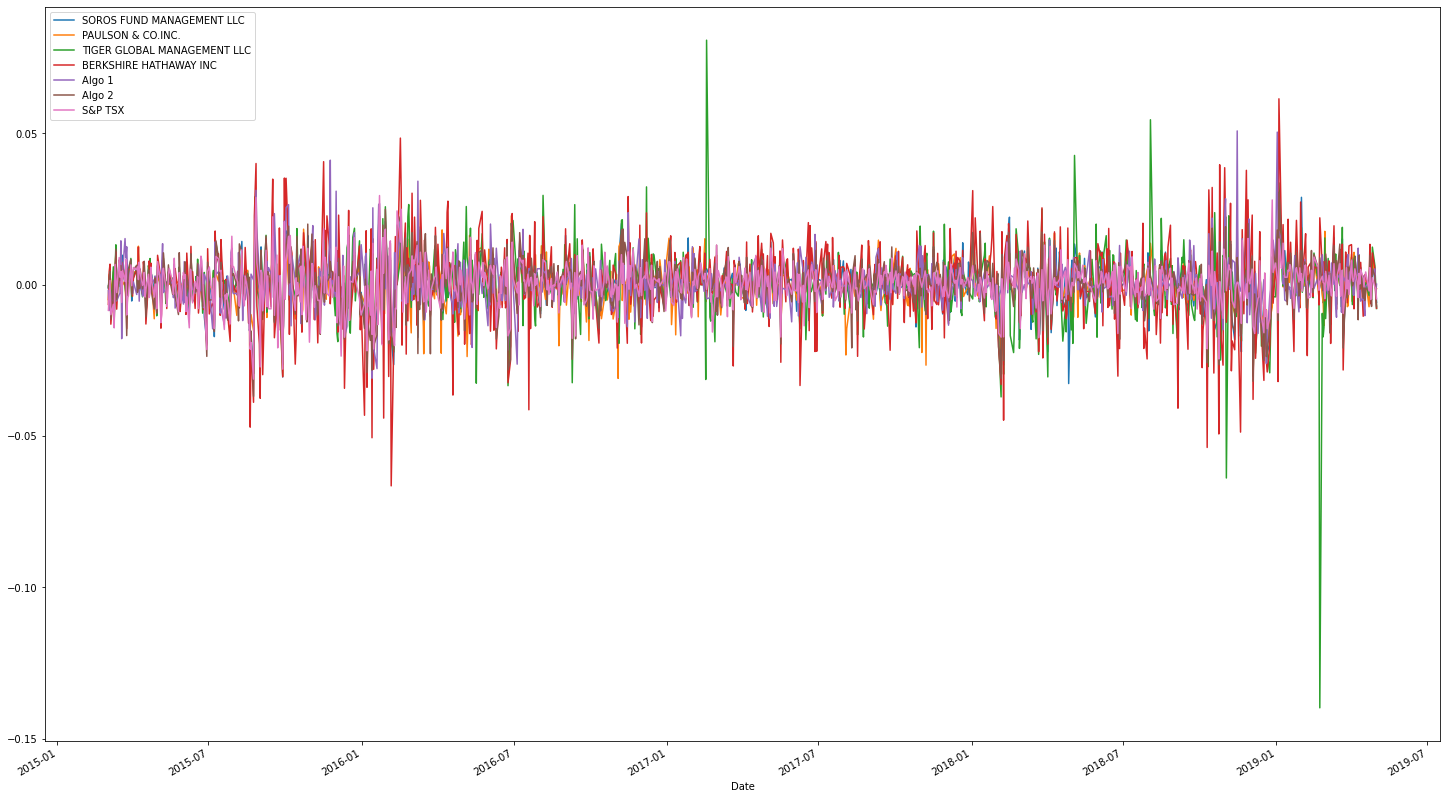

In [33]:
# Plot daily returns of all portfolios
joined_portfolio.plot(figsize=(25,15))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

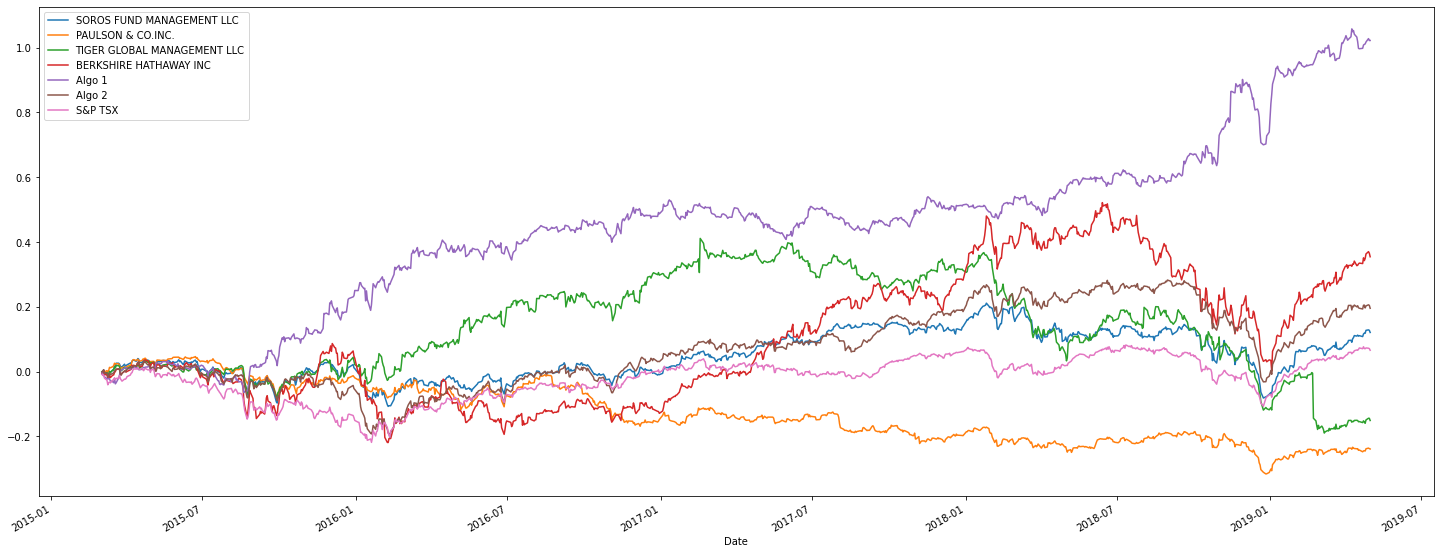

In [34]:
# Calculate cumulative returns of all portfolios
cummulative_returns = (1 + joined_portfolio).cumprod() - 1

# Plot cumulative returns
cummulative_returns.plot(figsize=(25,10))

In [35]:
cummulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011872
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010544
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020411
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026832


### Other than PAULSON & CO.INC and TIGER GLOBAL MANAGEMENT LLC, all the other investments are performing better than S&P TSX

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

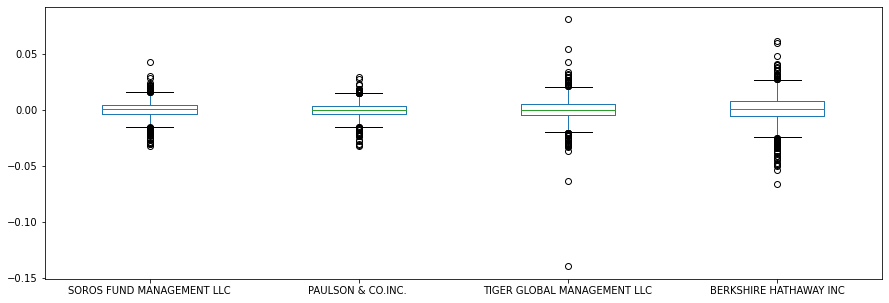

In [36]:
# Box plot to visually show risk
# whale_portfolio returns 
whale_portf_df.plot(kind="box", figsize=(15,5))

<AxesSubplot:>

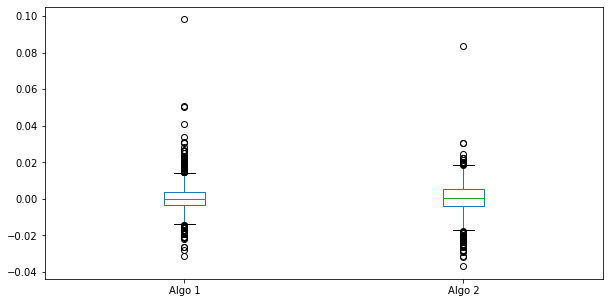

In [37]:
# Box plot to visually show risk
#Algor_portfolio_returns
algo_returns_df.plot(kind="box", figsize=(10,5))

<AxesSubplot:>

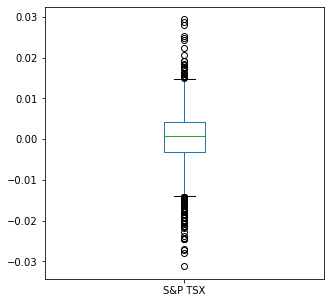

In [38]:
daily_returns_sp_tsx_history.plot(kind="box", figsize=(5,5))

### Calculate Standard Deviations

In [39]:
# Calculate the daily standard deviations of all portfolios

std_dev_joined_portfolio = joined_portfolio.std()
std_dev_joined_portfolio

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [40]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std_dev_sp_tsx = daily_returns_sp_tsx_history.std()
daily_std_dev_sp_tsx


S&P TSX    0.006637
dtype: float64

In [41]:
# Determine which portfolios are riskier than the S&P TSX 60
std_dev_joined_portfolio > std_dev_joined_portfolio["S&P TSX"]
#daily_std_dev_whale > daily_std_dev_sp_tsx


SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P TSX                        False
dtype: bool

## " Only PAULSON & CO.INC is less risker than S&P "

### Calculate the Annualized Standard Deviation

In [42]:
# Calculate the annualized standard deviation (252 trading days)
#Annualised STD DEV of the combined portfolio

annual_std_dev_combined = std_dev_joined_portfolio * np.sqrt(252)
annual_std_dev_combined

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

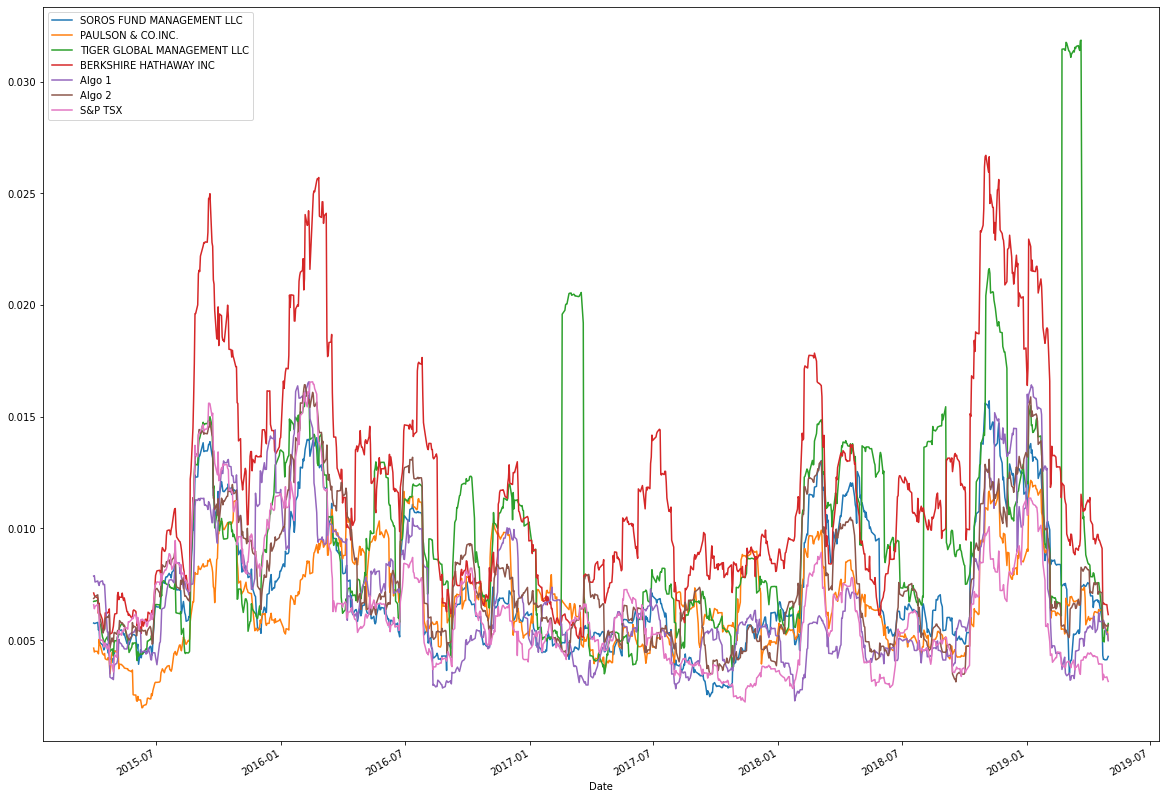

In [43]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

rolling_std_dev_portfolio = joined_portfolio.rolling(window=21).std()
rolling_std_dev_portfolio.plot(figsize=(20,15))


### Calculate and plot the correlation

In [44]:
# Calculate the correlation
correlation_portfolio = joined_portfolio.corr()

# Display de correlation matrix
correlation_portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

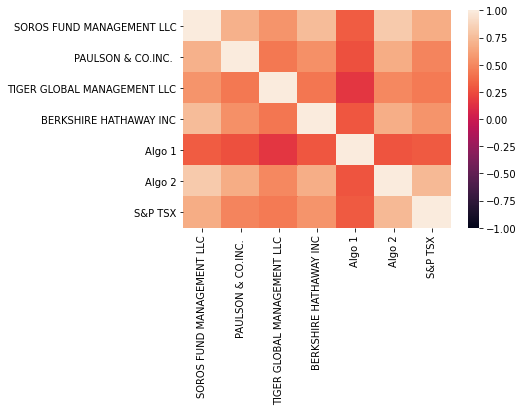

In [45]:
sns.heatmap(correlation_portfolio, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [46]:
# Calculate covariance of a single portfolio
# Plot beta trend

# 60-Day rolling beta trend of ALGO 2
rolling_covar = joined_portfolio["Algo 2"].rolling(window=60).cov(joined_portfolio["S&P TSX"])
#rolling_covar
rolling_var = joined_portfolio["S&P TSX"].rolling(window=60).var()
#rolling_var
beta = rolling_covar / rolling_var

<AxesSubplot:title={'center':' 60-DAY Rolling BETA of ALGO 2'}, xlabel='Date'>

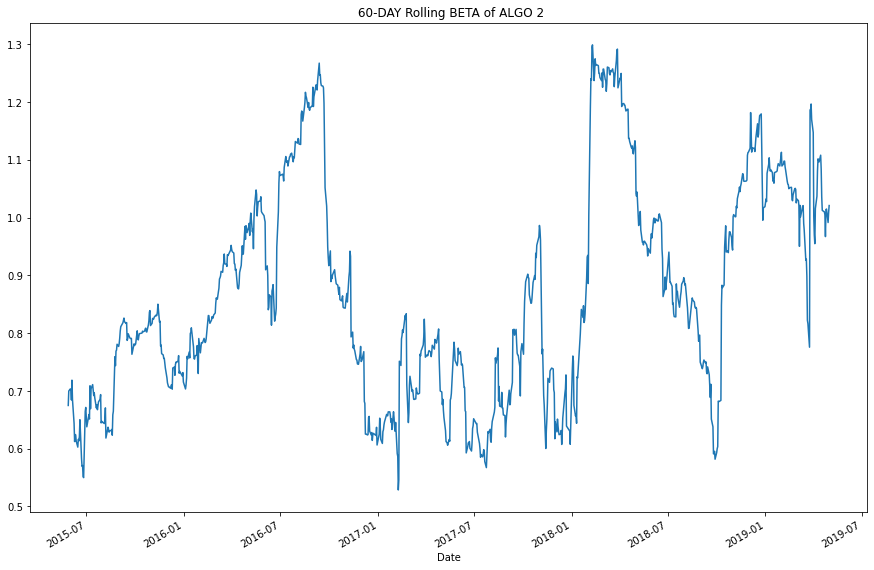

In [47]:

beta.plot(figsize=(15,10), title = " 60-DAY Rolling BETA of ALGO 2")
#ax.legend(["ALGO2", "S&P TSX"],figsize=(15,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [48]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_portfolio.mean() * 252) / (joined_portfolio.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio of the Portfolio'}>

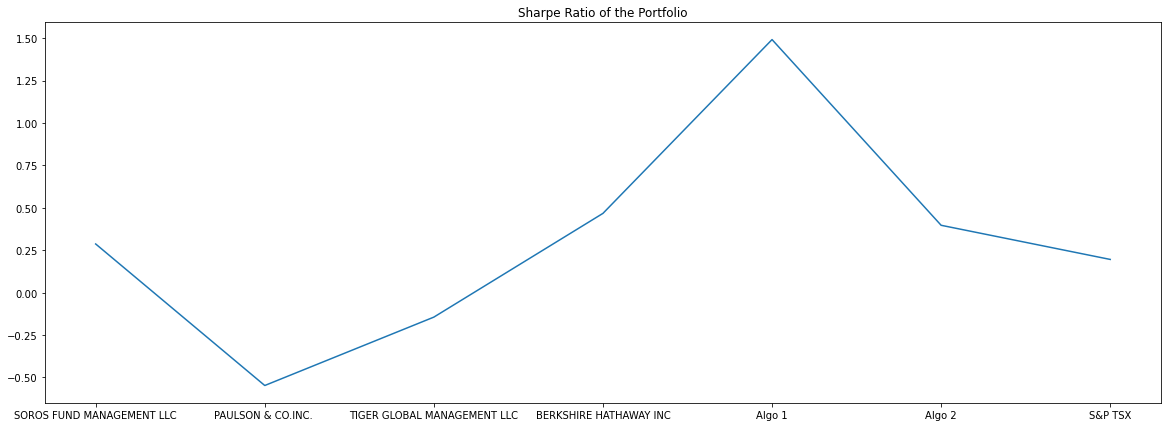

In [50]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(figsize=(20,7), title="Sharpe Ratio of the Portfolio")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [51]:
# Reading data from 1st stock
csvpath_l = ("l_historical.csv") 
loblaw_df = pd.read_csv(csvpath_l, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [52]:
# Reading data from 2nd stock
csvpath_shop = ("shop_historical.csv") 
shop_df = pd.read_csv(csvpath_shop, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [53]:
# Reading data from 3rd stock
csvpath_otex = ("otex_historical.csv") 
otex_df = pd.read_csv(csvpath_otex, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [79]:
# Reading data from 4th stock
csvpath_tesla = ("tesla_historical.csv") 
tsla_df = pd.read_csv(csvpath_tesla, index_col="Date", infer_datetime_format=True, parse_dates=True)
tsla_df.head()

,Symbol,Close
Date,,
2018-01-02,TSLA,64.11
2018-01-03,TSLA,63.45
2018-01-04,TSLA,62.92
2018-01-05,TSLA,63.32
2018-01-08,TSLA,67.28


In [80]:
# Reading data from 5th stock
csvpath_apple = ("apple_historical.csv") 
aapl_df = pd.read_csv(csvpath_apple, index_col="Date", infer_datetime_format=True, parse_dates=True)
aapl_df.head()

,Symbol,Close
Date,,
2018-01-02,AAPL,43.07
2018-01-03,AAPL,43.06
2018-01-04,AAPL,43.26
2018-01-05,AAPL,43.75
2018-01-08,AAPL,43.59


In [81]:
# Combine all stocks in a single DataFrame
combined_portfolio_df = pd.concat([loblaw_df, shop_df, otex_df, tsla_df, aapl_df], axis="columns", join="inner" )
combined_portfolio_df.head()

,Symbol,Close,Symbol,Close,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,,,,,
2018-01-02,L,57.99,SHOP,132.06,OTEX,43.58,TSLA,64.11,AAPL,43.07
2018-01-03,L,57.41,SHOP,135.15,OTEX,43.07,TSLA,63.45,AAPL,43.06
2018-01-04,L,57.42,SHOP,137.46,OTEX,42.91,TSLA,62.92,AAPL,43.26
2018-01-05,L,57.42,SHOP,137.26,OTEX,42.57,TSLA,63.32,AAPL,43.75
2018-01-08,L,56.86,SHOP,139.51,OTEX,42.16,TSLA,67.28,AAPL,43.59


In [82]:
# droping symbol columns
combined_portfolio_df = combined_portfolio_df.drop(columns=["Symbol"])


In [83]:
# Reorganize portfolio data by having a column per symbol
combined_portfolio_df.columns = ["Loblaw" , "SHOP" , "OTEX" , "TSLA" , "AAPL"] 
combined_portfolio_df.head()

,Loblaw,SHOP,OTEX,TSLA,AAPL
Date,,,,,
2018-01-02,57.99,132.06,43.58,64.11,43.07
2018-01-03,57.41,135.15,43.07,63.45,43.06
2018-01-04,57.42,137.46,42.91,62.92,43.26
2018-01-05,57.42,137.26,42.57,63.32,43.75
2018-01-08,56.86,139.51,42.16,67.28,43.59


In [84]:
# Calculate daily returns
daily_returns_portfolio_df = combined_portfolio_df.pct_change()
daily_returns_portfolio_df

# Drop NAs
daily_returns_portfolio_df = daily_returns_portfolio_df.dropna().copy()

# Display sample data
daily_returns_portfolio_df.head()

,Loblaw,SHOP,OTEX,TSLA,AAPL
Date,,,,,
2018-01-03,-0.010002,0.023398,-0.011703,-0.010295,-0.000232
2018-01-04,0.000174,0.017092,-0.003715,-0.008353,0.004645
2018-01-05,0.000000,-0.001455,-0.007924,0.006357,0.011327
2018-01-08,-0.009753,0.016392,-0.009631,0.062539,-0.003657
2018-01-09,0.008969,-0.011254,-0.000712,-0.008026,-0.000229


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [85]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return
portfolio_returns = daily_returns_portfolio_df.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2018-01-03   -0.001767
2018-01-04    0.001969
2018-01-05    0.001661
2018-01-08    0.011178
2018-01-09   -0.002250
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [86]:
# Join your returns DataFrame to the original returns DataFrame
joined_portfolio = pd.concat([daily_returns_portfolio_df, portfolio_returns], axis="columns", join ="inner")
joined_portfolio.columns = ["Loblaw", "SHOP", "OTEX", "TSLA", "AAPL", "Combined"]
joined_portfolio.head()


,Loblaw,SHOP,OTEX,TSLA,AAPL,Combined
Date,,,,,,
2018-01-03,-0.010002,0.023398,-0.011703,-0.010295,-0.000232,-0.001767
2018-01-04,0.000174,0.017092,-0.003715,-0.008353,0.004645,0.001969
2018-01-05,0.000000,-0.001455,-0.007924,0.006357,0.011327,0.001661
2018-01-08,-0.009753,0.016392,-0.009631,0.062539,-0.003657,0.011178
2018-01-09,0.008969,-0.011254,-0.000712,-0.008026,-0.000229,-0.002250


In [87]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_portfolio = joined_portfolio.dropna().copy()


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [88]:
# Calculate the annualized `std`
std_dev_joined_portfolio = joined_portfolio.std()
std_dev_joined_portfolio



Loblaw      0.009667
SHOP        0.031033
OTEX        0.013661
TSLA        0.033967
AAPL        0.017306
Combined    0.013949
dtype: float64

In [89]:
annu_std_dev = std_dev_joined_portfolio * np.sqrt(252)
annu_std_dev

Loblaw      0.153458
SHOP        0.492627
OTEX        0.216868
TSLA        0.539208
AAPL        0.274722
Combined    0.221429
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

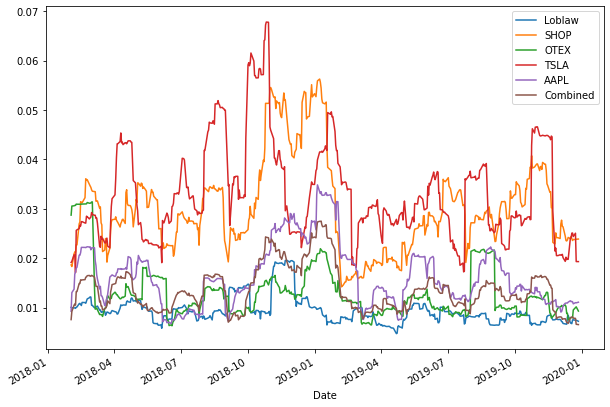

In [90]:


# Calculate rolling standard deviation
joined_portfolio = joined_portfolio.rolling(window=21).std()

# Plot rolling standard deviation
joined_portfolio.plot(figsize=(10,7)) 

#ax.legend(["Loblaw" , "SHOP" , "OTEX" , "Combined"])

### Calculate and plot the correlation

<AxesSubplot:>

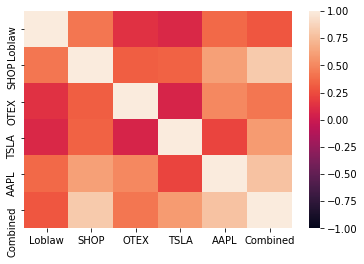

In [91]:
# Calculate and plot the correlation
correlation = joined_portfolio.corr()
correlation
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [93]:
# Calculate and plot Beta
rolling_portfolio = daily_returns_portfolio_df.rolling(window=60).mean()
rolling_portfolio.head()



,Loblaw,SHOP,OTEX,TSLA,AAPL
Date,,,,,
2018-01-03,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN,NaN


In [71]:
variance_rolling_sptsx = rolling_sptsc.var()
variance_rolling_sptsx

NameError: name 'rolling_sptsc' is not defined

In [ ]:


#rolling_sptsx = daily_returns_sp_tsx_history.rolling(window=60).mean()
#rolling_sptsx


#variance = rolling_portfolio.var()
#variance

#covariance = rolling_portfolio.cov(rolling_sptsx)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios
Sharpe Ratio = annualized avg returns / annualized std dev

daily_returns_portfolio_df

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe

### How does your portfolio do?

Write your answer here!